In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('C:\\Users\\hp\Downloads\\Placement.csv')

In [4]:
data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [5]:
print(data.columns.values) #displays all columns

['sl_no' 'gender' 'ssc_p' 'ssc_b' 'hsc_p' 'hsc_b' 'hsc_s' 'degree_p'
 'degree_t' 'workex' 'etest_p' 'specialisation' 'mba_p' 'status' 'salary']


In [6]:
data.head() #displays first 5 rows

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [7]:
print('-'*50)
print("Describe data")
print('-'*50)
print(data.describe())   #gives data of every column

--------------------------------------------------
Describe data
--------------------------------------------------
            sl_no       ssc_p       hsc_p    degree_p     etest_p       mba_p  \
count  215.000000  215.000000  215.000000  215.000000  215.000000  215.000000   
mean   108.000000   67.303395   66.333163   66.370186   72.100558   62.278186   
std     62.209324   10.827205   10.897509    7.358743   13.275956    5.833385   
min      1.000000   40.890000   37.000000   50.000000   50.000000   51.210000   
25%     54.500000   60.600000   60.900000   61.000000   60.000000   57.945000   
50%    108.000000   67.000000   65.000000   66.000000   71.000000   62.000000   
75%    161.500000   75.700000   73.000000   72.000000   83.500000   66.255000   
max    215.000000   89.400000   97.700000   91.000000   98.000000   77.890000   

              salary  
count     148.000000  
mean   288655.405405  
std     93457.452420  
min    200000.000000  
25%    240000.000000  
50%    265000.00

In [8]:
#As it is clear we don't need sl_no in training model 
#axis= 1 is column and axis=0 is row
data = data.drop(['sl_no'],axis=1)

In [9]:
# Exploring important features

<Axes: xlabel='status', ylabel='count'>

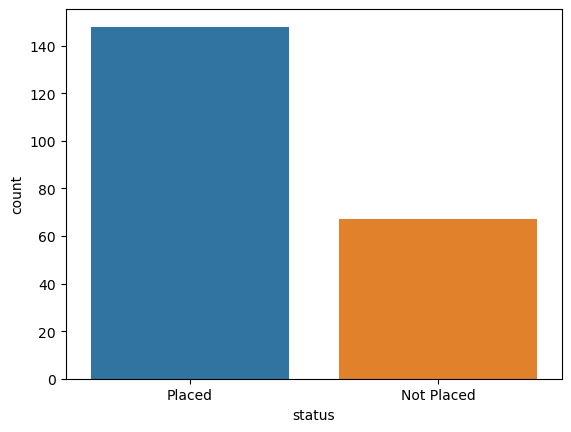

In [10]:
sns.countplot(data=data,x=data['status'])

In [11]:
data['gender'].value_counts()

gender
M    139
F     76
Name: count, dtype: int64

In [12]:
#gender group by status 
df = pd.DataFrame(data.groupby(['gender','status'])['status'].count())

In [13]:
df

status
gender status            
F      Not Placed      28
       Placed          48
M      Not Placed      39
       Placed         100

<Axes: xlabel='gender', ylabel='count'>

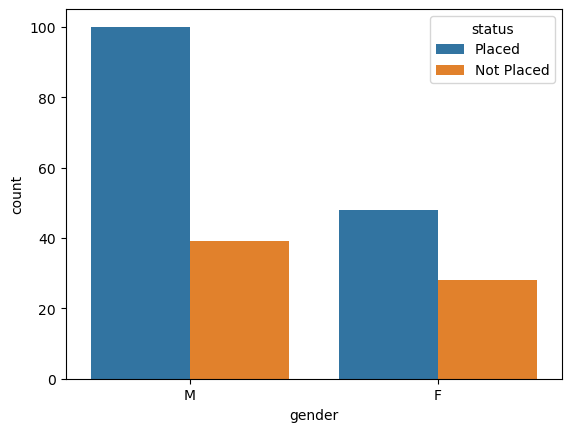

In [14]:
# data=data second data is our variable name (data)
# hue is basically coming on y axis and is telling what to count
sns.countplot(x='gender',hue='status',data=data)

In [15]:
# Conclusion of graph: Male have high chances of getting placed compared to females
# It means gender contibutes to get placement according to the data

C:\Users\hp\AppData\Local\Temp\ipykernel_8272\1932711365.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ssc_p'])


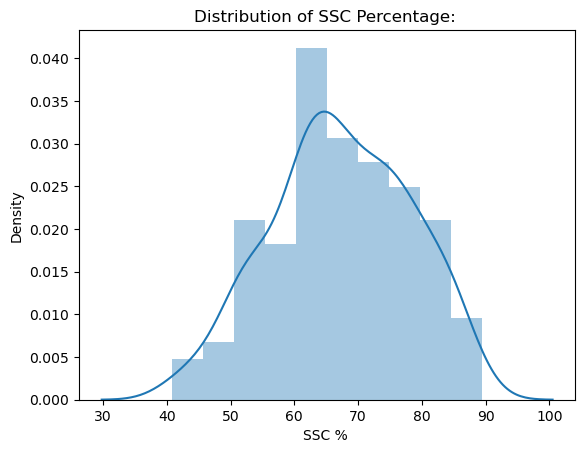

In [16]:
sns.distplot(data['ssc_p'])
plt.title('Distribution of SSC Percentage: ')
plt.xlabel('SSC % ')
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


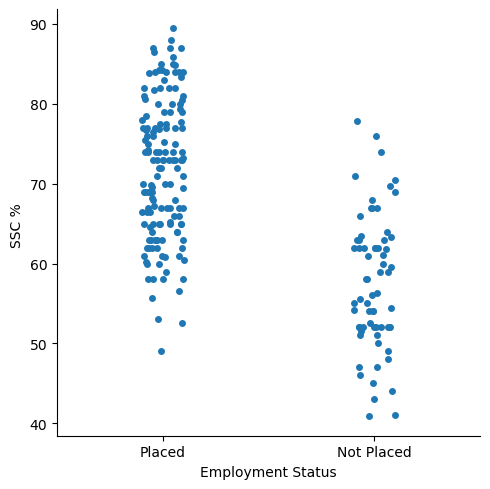

In [17]:
sns.catplot(y='ssc_p',x='status',data=data)
plt.xlabel('Employment Status')
plt.ylabel('SSC % ')
plt.show()

In [20]:
data['ssc_b'].value_counts()

ssc_b
Central    116
Others      99
Name: count, dtype: int64

In [21]:
df = pd.DataFrame(data.groupby(['ssc_b','status'])['status'].count())

In [22]:
df

status
ssc_b   status            
Central Not Placed      38
        Placed          78
Others  Not Placed      29
        Placed          70

<Axes: xlabel='ssc_b', ylabel='count'>

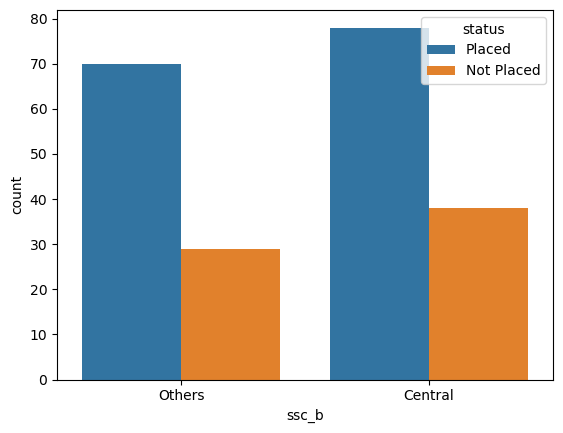

In [23]:
sns.countplot(x='ssc_b',hue='status',data=data)

In [ ]:
#Board hardly matters in placement

C:\Users\hp\AppData\Local\Temp\ipykernel_1900\1716968105.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['hsc_p'],kde=False)


Text(0.5, 0, 'HSC %')

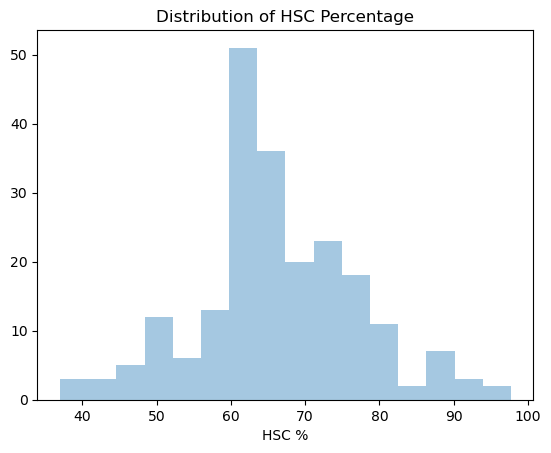

In [11]:
sns.distplot(data['hsc_p'],kde=False)
plt.title('Distribution of HSC Percentage')
plt.xlabel('HSC %')

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 9.444444444444438, 'HSC %')

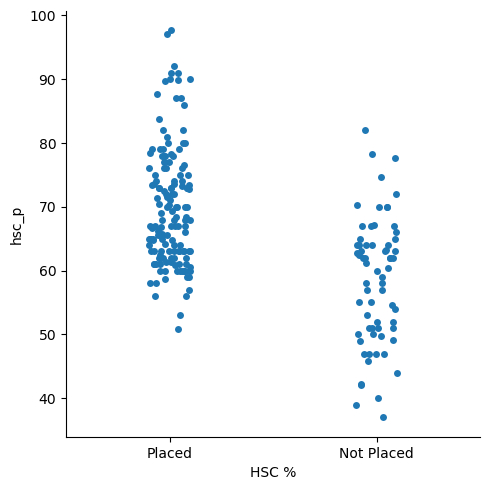

In [7]:
sns.catplot(y='hsc_p',x='status',data=data)
plt.xlabel('Employement Status')
plt.xlabel('HSC %')

In [ ]:
#EDA for HSC Board

In [8]:
data['hsc_b'].value_counts()

hsc_b
Others     131
Central     84
Name: count, dtype: int64

In [9]:
df = pd.DataFrame(data.groupby(['hsc_b','status'])['status'].count())

In [10]:
df

status
hsc_b   status            
Central Not Placed      27
        Placed          57
Others  Not Placed      40
        Placed          91

<Axes: xlabel='hsc_b', ylabel='count'>

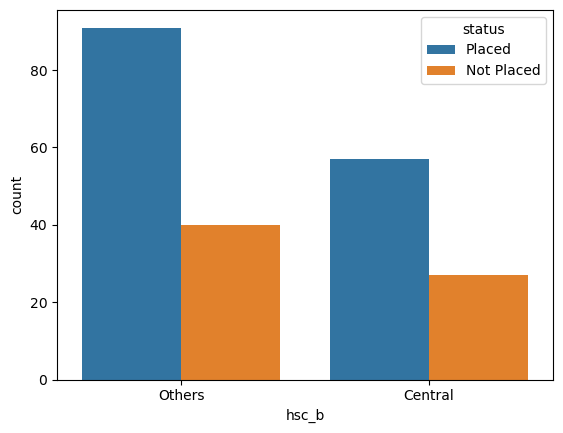

In [13]:
sns.countplot(x='hsc_b',hue='status',data=data)

In [14]:
ff = pd.DataFrame(data.groupby(['hsc_s','status'])['status'].count())

In [15]:
ff

status
hsc_s    status            
Arts     Not Placed       5
         Placed           6
Commerce Not Placed      34
         Placed          79
Science  Not Placed      28
         Placed          63

C:\Users\hp\AppData\Local\Temp\ipykernel_1900\2766650139.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['degree_p'],kde=False)


Text(0.5, 0, 'Degree %')

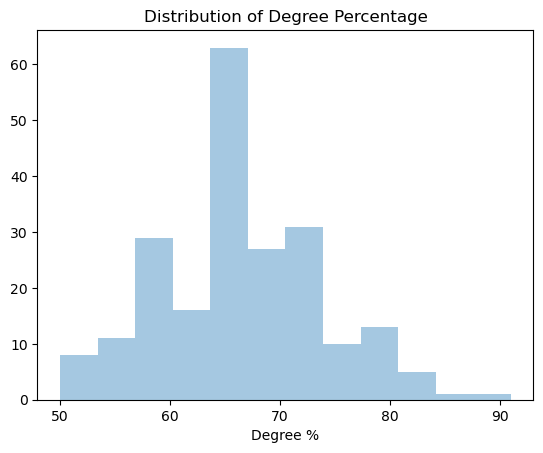

In [16]:
sns.distplot(data['degree_p'],kde=False)
plt.title('Distribution of Degree Percentage')
plt.xlabel('Degree %')

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 9.444444444444438, 'Degree %')

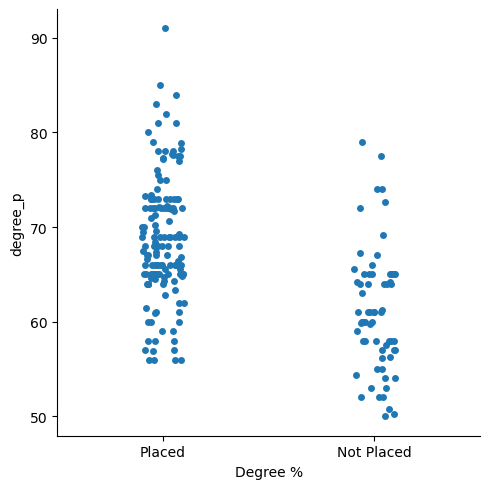

In [17]:
sns.catplot(y='degree_p',x='status',data=data)
plt.xlabel('Employement Status')
plt.xlabel('Degree %')

In [ ]:
#Work Experience

In [18]:
data['workex'].value_counts()

workex
No     141
Yes     74
Name: count, dtype: int64

In [19]:
df = pd.DataFrame(data.groupby(['workex','status'])['status'].count())

In [20]:
df

status
workex status            
No     Not Placed      57
       Placed          84
Yes    Not Placed      10
       Placed          64

<Axes: xlabel='workex', ylabel='count'>

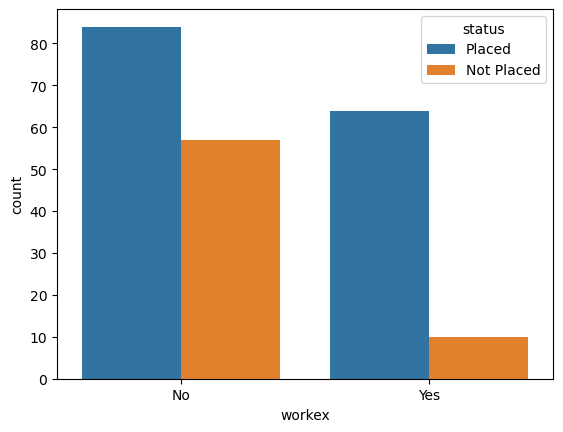

In [21]:
sns.countplot(x='workex',hue='status',data=data)

In [ ]:
#clear that candidates having work exprience have higher chance of getting placed

In [22]:
#Corelation between Featues

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


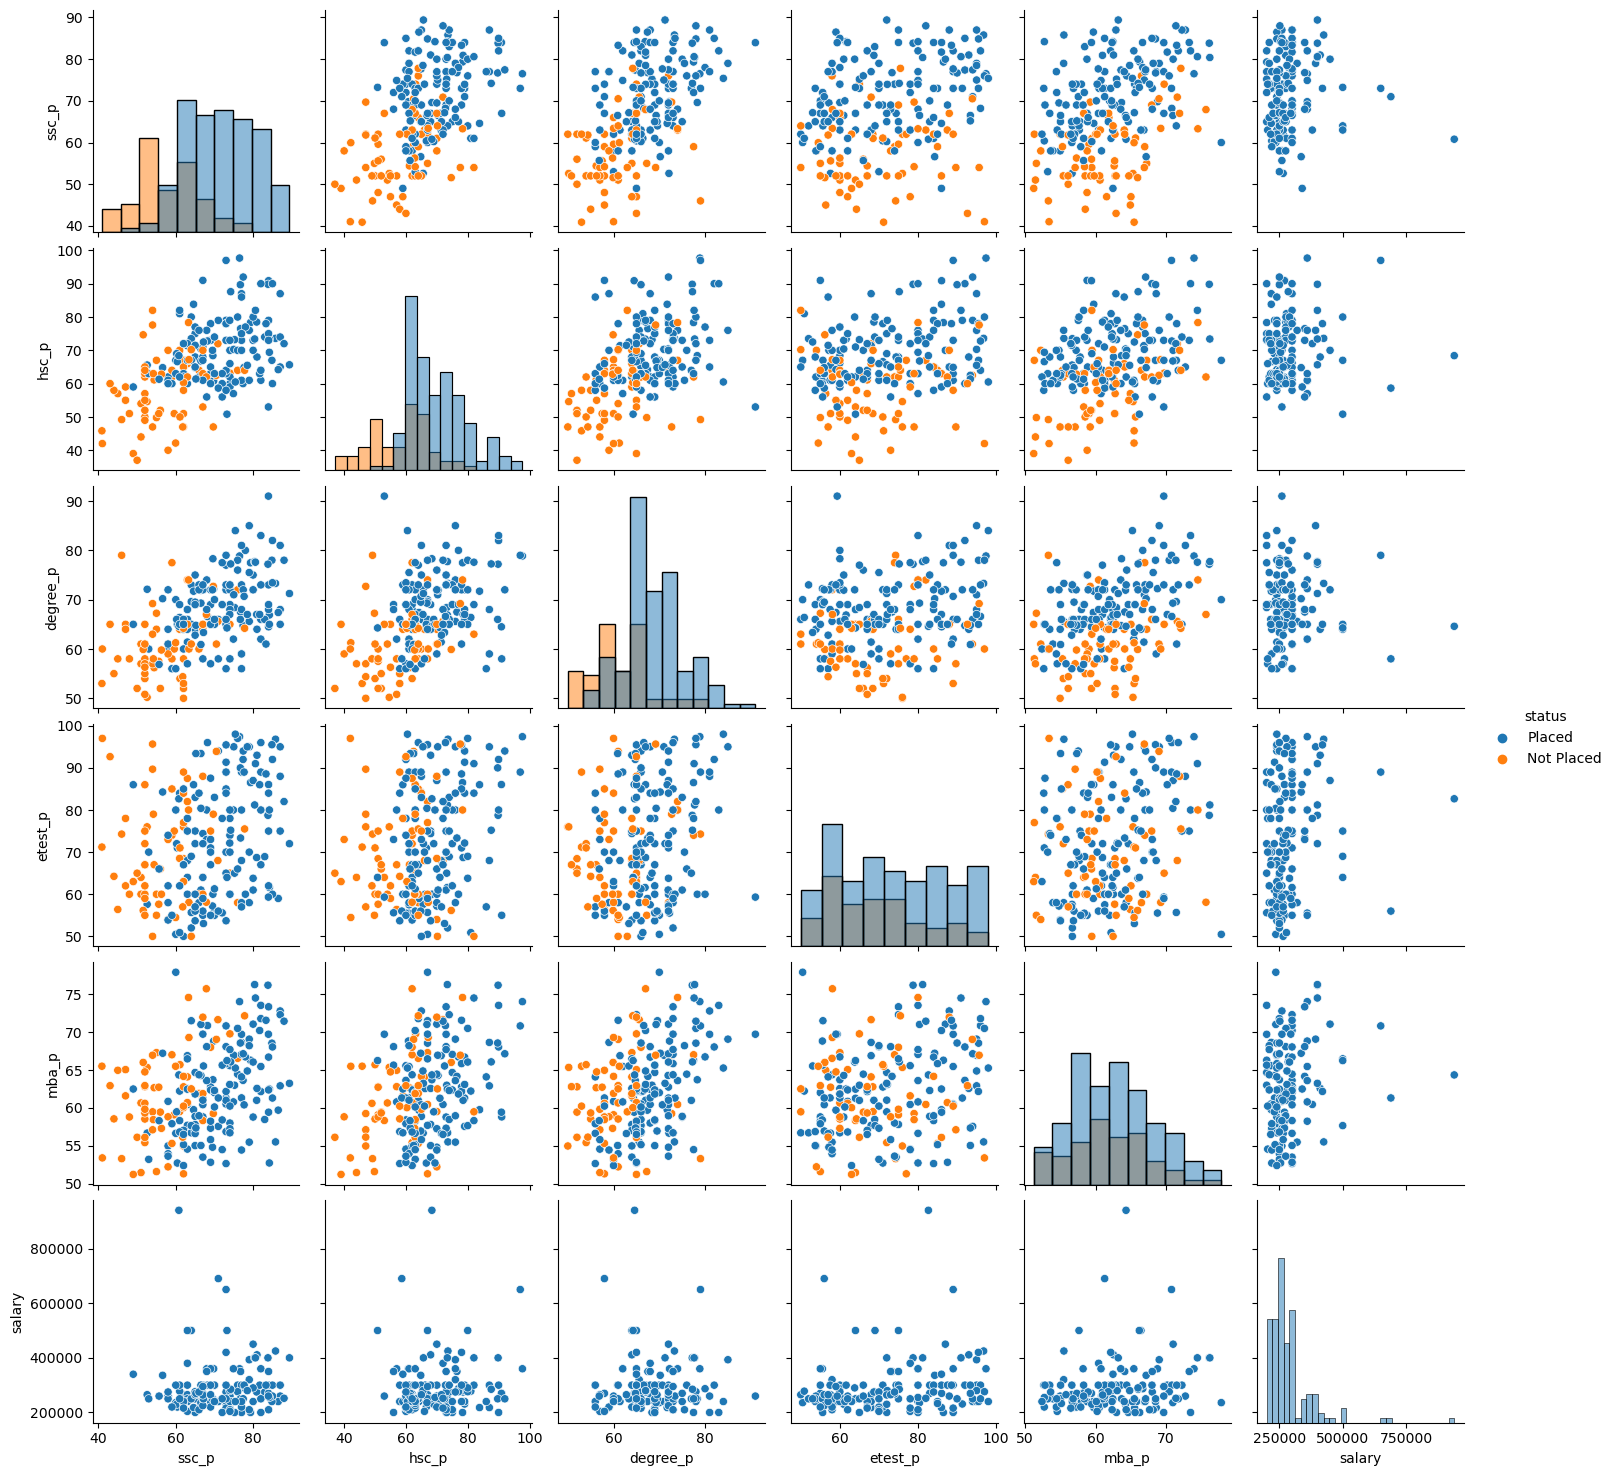

In [24]:
sns.pairplot(data=data[['ssc_p','hsc_p','degree_p','etest_p','mba_p','salary','status']],hue="status",diag_kind='hist')

In [26]:
#Let's drop all unwanted columns as mentioned in above section.

# SSC Board
# HSC Board
# HSC Specialisation
# Degree Type
# Salary

SyntaxError: invalid syntax (3487403784.py, line 3)

In [27]:
data.drop(['ssc_b','hsc_b','hsc_s','degree_t','salary'],axis=1,inplace=True)

In [25]:
#Feature mapping

In [28]:
#Let's map categorical feature to numeric one. Categorical features:

In [29]:
data["gender"]=data.gender.map({"M":0,"F":1})
data["workex"]=data.workex.map({"No":0,"Yes":1})
data["status"]=data.status.map({"Not Placed":0,"Placed":1})
data["specialisation"]=data.specialisation.map({"Mkt&HR":0,"Mkt&Fin":1})

In [30]:
data.columns

Index(['sl_no', 'gender', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'etest_p',
       'specialisation', 'mba_p', 'status'],
      dtype='object')

In [33]:
data.head()

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,1,0,67.00,91.00,58.00,0,55.0,0,58.80,1
1,2,0,79.33,78.33,77.48,1,86.5,1,66.28,1
2,3,0,65.00,68.00,64.00,0,75.0,1,57.80,1
3,4,0,56.00,52.00,52.00,0,66.0,0,59.43,0
4,5,0,85.80,73.60,73.30,0,96.8,1,55.50,1
